<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/%E3%80%8C%E5%9C%98%E5%B0%88_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.mobilenet_v3 import MobileNetV3Large
mv3 = MobileNetV3Large(include_top=False,  input_shape=(224, 224, 3))

mv3.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [2]:
import glob
import pandas as pd
# 先不讀取圖片,真的要訓練才讀
# {0:"fiona", 1:"十二之捲", 2:"千佛手", }
target_name = [
        "fiona", "十二之卷", "千佛手", "千兔耳", "墨西哥雪球",
        "姬攏月", "實生百合", "桃蛋", "沙漠玫瑰", "火祭",
        "熊童子", "白牡丹", "石蓮", "萬聖節法師", "觀音蓮",
        "銀之鈴", "錦司晃", "雅樂之舞", "雪兔-麗娜蓮", "鹿角海棠",
        "黛比", "月兔耳", "達摩福娘"
        ]
df = pd.DataFrame(columns=["path", "target"])
for i, name in enumerate(target_name):
    for p in glob.glob(f"/content/drive/MyDrive/團體專題/{name}/*.png"):
        s = pd.Series([p, i], index=["path", "target"])
        df = df.append(s, ignore_index=True)
    for p in glob.glob(f"/content/drive/MyDrive/團體專題/{name}/*.jpeg"):
        s = pd.Series([p, i], index=["path", "target"])
        df = df.append(s, ignore_index=True)
    for p in glob.glob(f"/content/drive/MyDrive/團體專題/{name}/*.jpg"):
        s = pd.Series([p, i], index=["path", "target"])
        df = df.append(s, ignore_index=True)
df


<ipython-input-2-1e523c08f731>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-2-1e523c08f731>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-2-1e523c08f731>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-2-1e523c08f731>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s, ignore_index=True)
<ipython-input-2-1e523c08f731>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df

,path,target
0,/content/drive/MyDrive/團體專題/fiona/070.jpeg,0
1,/content/drive/MyDrive/團體專題/fiona/028.jpeg,0
2,/content/drive/MyDrive/團體專題/fiona/066.jpeg,0
3,/content/drive/MyDrive/團體專題/fiona/006.jpeg,0
4,/content/drive/MyDrive/團體專題/fiona/013.jpeg,0
...,...,...
2414,/content/drive/MyDrive/團體專題/達摩福娘/b065.jpg,22
2415,/content/drive/MyDrive/團體專題/達摩福娘/b002.jpg,22
2416,/content/drive/MyDrive/團體專題/達摩福娘/b001.jpg,22
2417,/content/drive/MyDrive/團體專題/達摩福娘/b003.jpg,22


In [3]:
from keras.utils.image_utils import load_img

In [4]:
df["target"].value_counts()

20    270
5     208
7     204
6     152
4     136
0     131
18    108
2     102
14    100
21    100
19    100
17    100
22    100
1     100
9     100
8     100
10     92
13     51
12     50
3      30
11     30
15     29
16     26
Name: target, dtype: int64

/content/drive/MyDrive/團體專題/桃蛋/IMG_2086.jpg


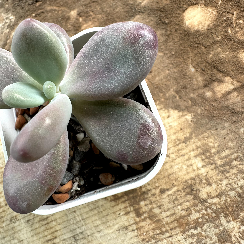

In [5]:

import random
c = random.randint(0, 2418)
print(df["path"][c])
img = load_img(df["path"][c], target_size=(244, 244))
img


In [6]:
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization

# 固定layer 不 train
# 眼睛
for l in mv3.layers:
    l.trainable = False
# BN(血管)
x = BatchNormalization()(mv3.output)
# vgg.output
x = Flatten()(mv3.output)
x = Dense(units=2048, activation="relu")(x)
x = Dense(units=256, activation="relu")(x)
# 貓狗分類: units = 1, units=2都可以
#     : sigmoid  , softmax 
x = Dense(units=23, activation="softmax")(x)
cnn = Model(inputs=mv3.input, outputs=x)
cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [7]:
# vgg layers list
mv3.layers

In [8]:
cnn.compile(loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"])

In [9]:
from sklearn.model_selection import train_test_split
# 先處理答案 轉成one-hot 
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(df["target"])
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(np.array(df["path"]),
        np.array(y_cat),
        test_size=0.1)
y_train[1520]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
# 你使用誰的模型就要用他的預處理
from keras.applications.mobilenet_v3 import preprocess_input
batch_size = 200
for j in range(30):
    # randit(下限, 上限不包括, 幾個)
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    # numpy 好用之處: array[索引list]
    # x_train[idx]
    imglist = []
    for fn in x_train[idx]:
        # 讀取圖片 並使用模型的預處理方式
        img = load_img(fn, target_size=(224, 224))
        img = preprocess_input(np.array(img))
        imglist.append(img)
    x = np.array(imglist)
    y = y_train[idx]
    result = cnn.train_on_batch(x, y)
    print("----------Times", j, "---" )
    print(result)

----------Times 0 ---
[5.502377510070801, 0.11500000208616257]
----------Times 1 ---
[47.30331039428711, 0.20000000298023224]
----------Times 2 ---
[47.51539993286133, 0.30000001192092896]
----------Times 3 ---
[37.5452766418457, 0.20999999344348907]
----------Times 4 ---
[22.184358596801758, 0.4650000035762787]
----------Times 5 ---
[14.893787384033203, 0.5]
----------Times 6 ---
[11.510272979736328, 0.5649999976158142]
----------Times 7 ---
[6.634952545166016, 0.6800000071525574]
----------Times 8 ---
[7.206835746765137, 0.6650000214576721]
----------Times 9 ---
[4.784788608551025, 0.7149999737739563]
----------Times 10 ---
[3.7914838790893555, 0.7300000190734863]
----------Times 11 ---
[2.5042779445648193, 0.8299999833106995]
----------Times 12 ---
[2.3852596282958984, 0.8299999833106995]
----------Times 13 ---
[1.0812610387802124, 0.8849999904632568]
----------Times 14 ---
[0.686776340007782, 0.9150000214576721]
----------Times 15 ---
[0.3773449659347534, 0.9350000023841858]
------

In [11]:
batch_size = 150

# randit(下限, 上限不包括, 幾個)
idx = np.random.randint(0, x_test.shape[0], batch_size)
# numpy 好用之處: array[索引list]
# x_train[idx]
imglist = []
for fn in x_test[idx]:
    # 讀取圖片 並使用模型的預處理方式
    img = load_img(fn, target_size=(224, 224))
    img = preprocess_input(np.array(img))
    imglist.append(img)
x = np.array(imglist)
y = y_test[idx]

print(cnn.evaluate(x, y))

5/5 [==============================] - 3s 179ms/step - loss: 0.5528 - accuracy: 0.8933
[0.552786648273468, 0.8933333158493042]


In [12]:
pre = cnn.predict(x).argmax(axis=-1)
pre

5/5 [==============================] - 1s 42ms/step


array([ 6, 18, 22,  4,  5, 19,  7,  4,  7,  3, 20,  6,  2, 14,  9,  5, 22,
        0,  2,  2, 22,  7, 22, 20, 14,  7,  0, 22, 14, 13,  5,  5, 21, 22,
        7, 14, 14, 13,  1, 22, 20, 20,  5,  7,  8, 22, 21, 22,  7, 20, 12,
        9,  7, 19, 13,  7,  7,  5,  4, 14,  7,  8,  2,  4, 13, 17, 21,  7,
        1, 14,  3,  7,  8,  7,  2, 14, 20, 20,  1,  0,  7, 21, 19,  7,  9,
        1, 20, 21, 18,  9, 20, 21, 20, 20,  0, 20,  1, 14,  7, 17, 19, 10,
        0,  4, 19,  2, 21, 12, 14, 20,  5,  0,  9, 14,  6, 20, 17, 18, 20,
        6, 19,  6, 16, 14,  2,  0, 20, 19,  6,  7,  2, 10,  4, 16,  2,  7,
       18, 20,  1, 14,  3, 20,  3, 10, 19,  7, 12,  0, 19,  0])